<a href="https://colab.research.google.com/github/Ramya810/CODSOFT/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITLE: MOVIE RATING PREDICTION WITH PYTHON

# Importing Libraries

In [ ]:
# import necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

# reading data

In [ ]:
# read the dataset into a dataframe
data= pd.read_csv("/content/archive (1).zip", encoding='latin1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Preprocessing

In [ ]:
# show the number of records and observations
data.shape

(15509, 10)

In [ ]:
print('number of rows',data.shape[0])
print('number of columns',data.shape[1])

number of rows 15509
number of columns 10


In [ ]:
#checking information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# check out the missing values in each observation
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
# drop records with missing value in some columns
fea=data.columns
fea


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
rating=data['Rating'].value_counts()
print("Rating Distributions:",rating)

Rating Distributions: 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
fea=['Name','Year','Duration','Rating','Votes']
data.dropna(subset=fea,inplace=True)
missing =data.isna().sum()
print(missing)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [ ]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
moviename=data[['Rating','Name']]
print(moviename.head())

   Rating                                Name
1     7.0  #Gadhvi (He thought he was Gandhi)
3     4.4                             #Yaaram
5     4.7                ...Aur Pyaar Ho Gaya
6     7.4                           ...Yahaan
8     5.6                  ?: A Question Mark


# Exploratory Data Analysis (EDA)

 1.Number of Movies each Year

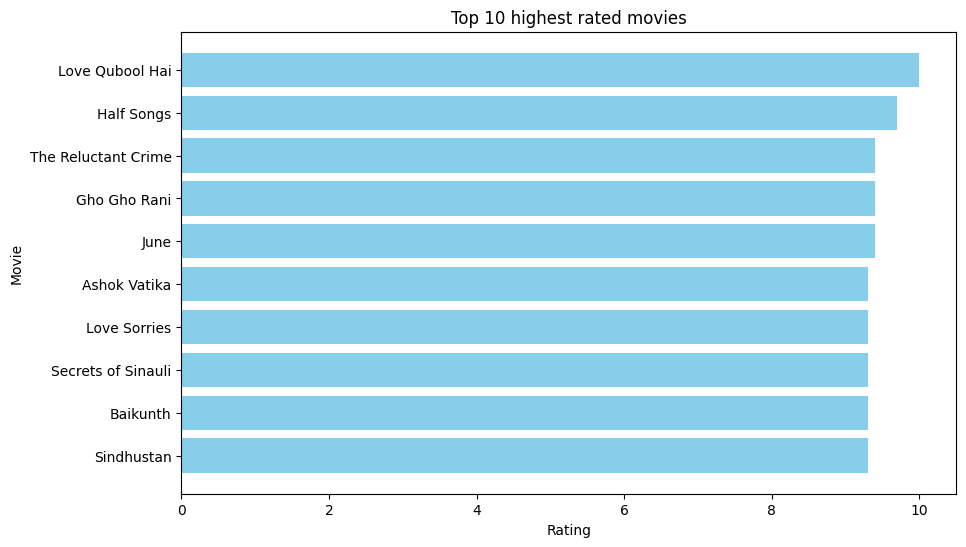

In [ ]:
top_ratedmovies=data.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_ratedmovies['Name'],top_ratedmovies['Rating'],color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 highest rated movies')
plt.gca().invert_yaxis()
plt.show()

  2.Creating Genre Dummy Columns and Analyzing Movie Counts by Genre

In [ ]:
# create dummy columns for each genre
dummies = data['Genre'].str.get_dummies(', ')
dummies

# creating a new dataframe which combines df and dummies
data_genre = pd.concat([data, dummies], axis=1)
data_genre

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,1,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,0,1,0,0,0,0,0,0,0,0
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,0,0,1,0,0,0,1,0
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,...,0,0,0,0,0,0,0,0,0,0
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,...,0,0,0,0,0,0,0,0,0,0
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,...,0,0,0,0,0,0,0,0,0,0
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,...,0,0,0,0,0,0,0,0,0,0


3.Top 20 Directors with the Most Movies

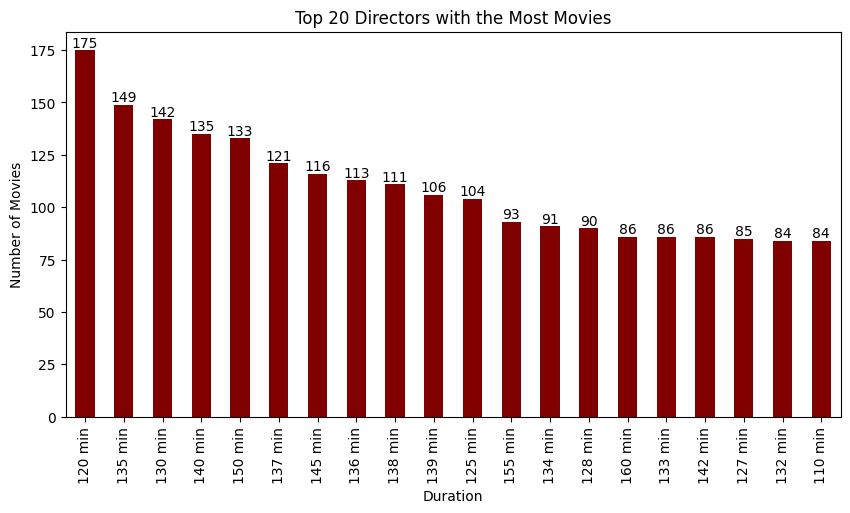

In [ ]:
# Analyzing count of movies of each director
director_movie_counts = data['Duration'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 5))
bars = director_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')
plt.xticks(rotation=90)

# Add count labels on top of the bars
for bar in bars.patches:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.show()

4.Movie Duration vs. Rating Scatter Plot

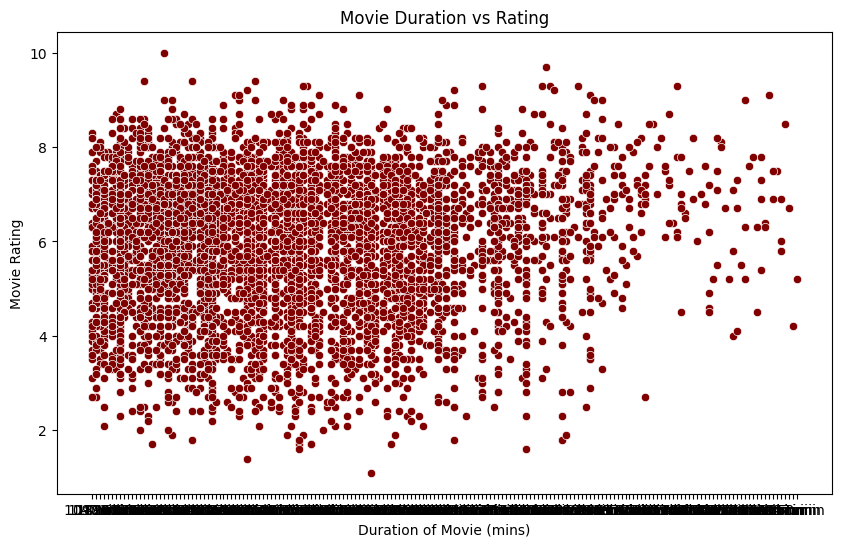

In [ ]:
plt.figure(figsize=(10, 6))
# create a scatter plot with Duration and Rating relationship
sns.scatterplot(x=data['Duration'], y=data['Rating'],  color = 'maroon')
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()

# Feature Engineering

In [ ]:
data_sorted=data.sort_values(by='Votes',ascending=False)
data_sorted['Vote_Count_Percentile']=data_sorted['Votes'].rank(pct=True)*100
data_sorted.reset_index(drop=True,inplace=True)
print(data_sorted[['Votes','Vote_Count_Percentile']])

      Votes  Vote_Count_Percentile
0       999             100.000000
1       998              99.982909
2       996              99.965818
3        99              99.905999
4        99              99.905999
...     ...                    ...
5846  1,008               0.085455
5847  1,006               0.059819
5848  1,006               0.059819
5849  1,004               0.034182
5850  1,002               0.017091

[5851 rows x 2 columns]


In [ ]:
# dropping the columns from the dataframe since these are the least dependable observations for target variable 'Rating'
data.drop(['Rating'], axis=1,inplace=True)
data.head(5)

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110.0,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147.0,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142.0,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82.0,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
data=data.dropna(subset=['Votes'])
data.head()

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110.0,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147.0,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142.0,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82.0,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Machine Learning Modeling Techniques

1. Linear Regression Model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data['Year']=data['Year'].astype(str)
data['Duration']=data['Duration'].astype(str)
data['Year']=data['Year'].str.extract('(\d+)').astype(float)
data['Duration']=data['Duration'].str.extract('(\d+)').astype(float)
X=data[['Year','Duration']]
Y=data['Duration']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred=model.predict(X_test)
m=mean_absolute_error(Y_test, Y_pred)
rm=mean_squared_error(Y_test, Y_pred,squared=False)
r2=r2_score(Y_test, Y_pred)
print(f"Mean absolute error:{m}")
print(f"Root mean Squared error:{rm}")
print(f"R Squared (R2) error:{r2}")

Mean absolute error:2.6030984939460545e-15
Root mean Squared error:6.7570905107905446e-15
R Squared (R2) error:1.0
